<a href="https://colab.research.google.com/github/sakhwathosan/bigdata-iot/blob/main/Final_Project_bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ethnicity Detection from Face Data using Deep Learning**

# **Uploading and Extracting the Dataset**

In [1]:
# Uploading dataset
from google.colab import files

uploaded = files.upload()

Saving Traindata.zip to Traindata.zip
Saving Testdata.zip to Testdata.zip


In [2]:
#Extracting Traindata
from zipfile import ZipFile
file_name = "/content/Traindata.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
#Extracting Testdata
from zipfile import ZipFile
file_name = "/content/Testdata.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# **Importing Libraries**

In [100]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, MaxPool2D
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import os
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint

In [5]:
img_size = (224, 224)

In [6]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# **Loading Training Data**

In [7]:
# Load training data
training_set = train_datagen.flow_from_directory(
    '/content/Traindata',
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

Found 65 images belonging to 2 classes.


# **Visualization**

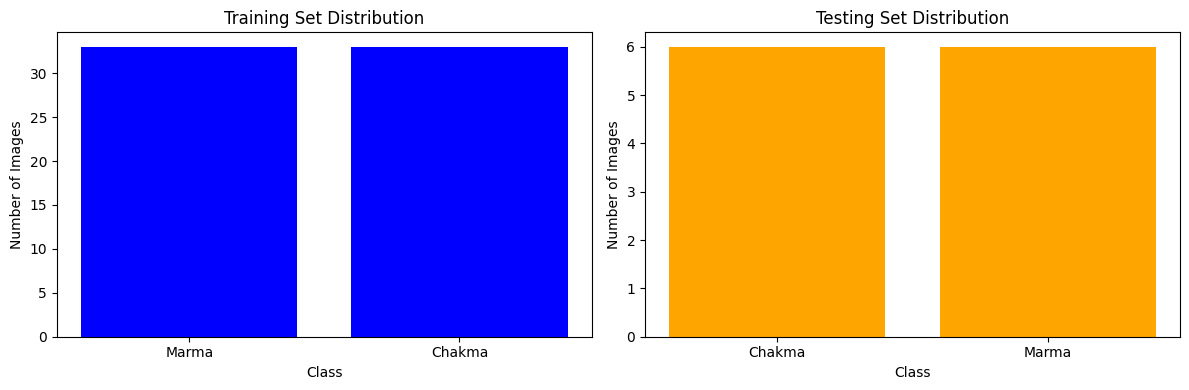

In [34]:
#Plotting Number of Images

train_path = '/content/Traindata'
test_path = '/content/Testdata'

class_names_train = [class_name for class_name in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, class_name))]
class_names_test = [class_name for class_name in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, class_name))]

train_counts = [len(os.listdir(os.path.join(train_path, class_name))) for class_name in class_names_train]
test_counts = [len(os.listdir(os.path.join(test_path, class_name))) for class_name in class_names_test]

# Plot the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(class_names_train,train_counts, color='blue')
ax1.set_title('Training Set Distribution')
ax1.set_xlabel('Class')
ax1.set_ylabel('Number of Images')

ax2.bar(('Chakma','Marma'), (6,6) ,color='orange')
ax2.set_title('Testing Set Distribution')
ax2.set_xlabel('Class')
ax2.set_ylabel('Number of Images')

plt.tight_layout()
plt.show()


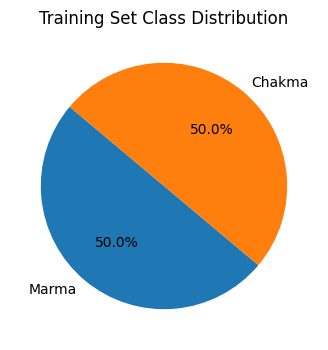

In [90]:
#Drawing PI Chart

plt.figure(figsize=(4, 4))
plt.pie(train_counts, labels=class_names_train, autopct='%1.1f%%', startangle=140)
plt.title('Training Set Class Distribution')
plt.show()

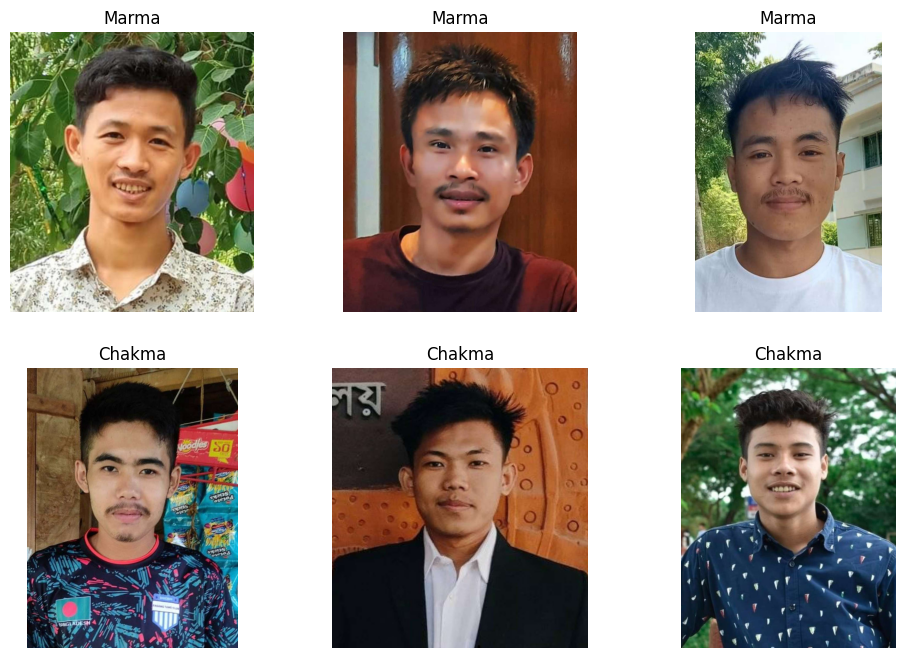

In [75]:
#Random Image from Training Set

import random
import matplotlib.image as mpimg

def plot_sample_images(directory, class_names, num_samples=3):
    plt.figure(figsize=(12, 8))
    for class_name in class_names:
        class_path = os.path.join(directory, class_name)
        image_files = [os.path.join(class_path, file) for file in os.listdir(class_path) if file.endswith(('jpg', 'jpeg', 'png'))]
        sample_images = random.sample(image_files, num_samples)

        for i, image_path in enumerate(sample_images, 1):
            plt.subplot(len(class_names), num_samples, (class_names.index(class_name) * num_samples) + i)
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.title(class_name)

    plt.show()

plot_sample_images('/content/Traindata', class_names_train)

# **Basic CNN Model Building**

In [52]:
# Building the CNN
model = Sequential()

In [53]:
model.add(Conv2D(32, (3, 3), input_shape=(img_size[0], img_size[1], 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [54]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [56]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# **Training**



In [59]:
#saving the best model
checkpoint_path = '/content/best_model.h5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Training the model
history = model.fit(
    training_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_data=test_set,
    validation_steps=len(test_set),
    callbacks=[checkpoint],
    verbose=1
)

best_model = load_model(checkpoint_path)

Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 0.5329 - accuracy: 0.6615
Epoch 1: val_accuracy improved from -inf to 0.83333, saving model to /content/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 10s 2s/step - loss: 0.5329 - accuracy: 0.6615 - val_loss: 0.4712 - val_accuracy: 0.8333
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 0.4852 - accuracy: 0.7846
Epoch 2: val_accuracy improved from 0.83333 to 0.91667, saving model to /content/best_model.h5
3/3 [==============================] - 9s 3s/step - loss: 0.4852 - accuracy: 0.7846 - val_loss: 0.4491 - val_accuracy: 0.9167
Epoch 3/10
3/3 [==============================] - ETA: 0s - loss: 0.4649 - accuracy: 0.7692
Epoch 3: val_accuracy did not improve from 0.91667
3/3 [==============================] - 8s 2s/step - loss: 0.4649 - accuracy: 0.7692 - val_loss: 0.7750 - val_accuracy: 0.5833
Epoch 4/10
3/3 [==============================] - ETA: 0s - loss: 0.7927 - accuracy: 0.5385
Epoch 4: val_accuracy did not improve from 0.91667
3/3 [==============================] - 10s 5s/step - loss: 0.7927 - accuracy: 0.5385 - val_loss: 0.6142 - val_accuracy: 0.5833
Epoch 5/10
3/3 [=====

# **Testing**

In [60]:
# Load testing data
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    '/content/Testdata',
    target_size=img_size,
    batch_size=4,
    class_mode='binary'
)

Found 12 images belonging to 2 classes.


In [61]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import tensorflow as tf

1/1 [==============================] - 0s 165ms/step
Chakma


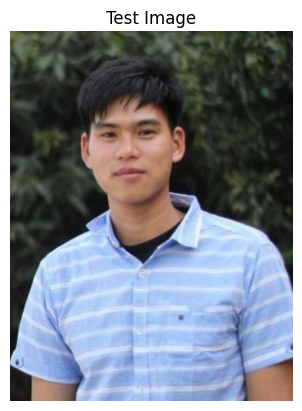

In [92]:
# Load the saved model
saved_model = load_model("/content/best_model.h5")

# Load an image from the test set
img_path = "/content/Testdata/Chakma/C3.jpg"
img = image.load_img(img_path, target_size=(img_size[0], img_size[1]))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.  # Normalize the pixel values

# Make predictions
output = saved_model.predict(img)

# Printing the class name based on the prediction
if output[0][0] > 0.5:
    print("Marma")
else:
    print("Chakma")

plt.imshow(mpimg.imread(img_path))
plt.axis('off')
plt.title('Test Image')
plt.show()

# **Accuracy Evaluation**

In [93]:
# Evaluate the model on the testing set
eval_result = model.evaluate(test_set, verbose=1)
print(f"Test loss: {eval_result[0]}, Test accuracy: {eval_result[1]}")

3/3 [==============================] - 0s 104ms/step - loss: 0.6915 - accuracy: 0.7500
Test loss: 0.6914992928504944, Test accuracy: 0.75


3/3 [==============================] - 0s 97ms/step


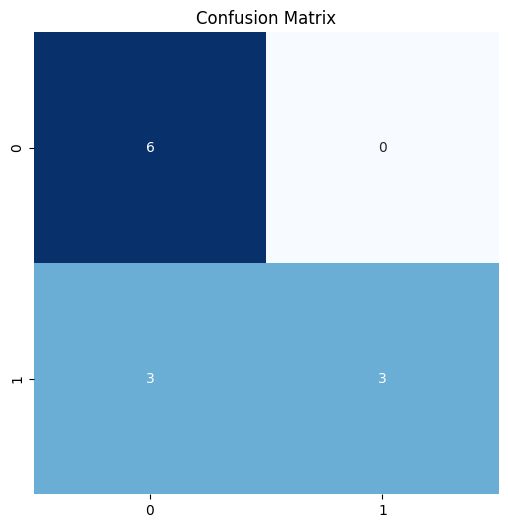

In [94]:
# Make predictions on the testing set
y_pred = model.predict(test_set)
y_pred = (y_pred > 0.5)

# Confusion matrix
cm = confusion_matrix(test_set.classes, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.show()

In [95]:
print(classification_report(test_set.classes, y_pred))  #classification report

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12



# **Applying Pretrained Model VGG16**

# **Model Building**

In [137]:
model2= Sequential()

In [138]:
#using VGG16

#input layer
model2.add(Conv2D(input_shape=(224,224,3),filters=64, kernel_size=(3,3),
                 padding='same',activation='relu'))
#Hidden layer
model2.add(Conv2D(filters=64, kernel_size=(3,3),padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3),padding='same',activation='relu'))
model2.add(Conv2D(filters=128, kernel_size=(3,3),padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu'))
model2.add(Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu'))
model2.add(Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(Conv2D(filters=512, kernel_size=(3,3),padding='same',activation='relu'))
model2.add(Conv2D(filters=512, kernel_size=(3,3),padding='same',activation='relu'))
model2.add(Conv2D(filters=512, kernel_size=(3,3),padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model2.add(Conv2D(filters=512, kernel_size=(3,3),padding='same',activation='relu'))
model2.add(Conv2D(filters=512, kernel_size=(3,3),padding='same',activation='relu'))
model2.add(Conv2D(filters=512, kernel_size=(3,3),padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

#Output Layer
model2.add(Flatten())
model2.add(Dense(units=4096,activation='relu')) #fully connected layer
model2.add(Dense(units=4096,activation='relu'))
model2.add(Dense(units=2,activation='softmax')) # number of output class is 2

In [139]:
#optimizer, loss function and accuracy metrics
import keras
from keras.optimizers import Adam

opt=Adam(learning_rate=.001)
model2.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [140]:
print(model2.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_50 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_52 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

# **Training**

In [143]:
#saving the best model

checkpoint_path = '/content/vgg16.h5'
checkpoint2 = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Training the model
history2 = model.fit(
    training_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_data=test_set,
    validation_steps=len(test_set),
    callbacks=[checkpoint2],
    verbose=1
)

best_model2 = load_model(checkpoint_path)

Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 0.1797 - accuracy: 0.9385
Epoch 1: val_accuracy improved from -inf to 0.91667, saving model to /content/vgg16.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 13s 2s/step - loss: 0.1797 - accuracy: 0.9385 - val_loss: 0.1366 - val_accuracy: 0.9167
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 0.1384 - accuracy: 0.9385
Epoch 2: val_accuracy did not improve from 0.91667
3/3 [==============================] - 10s 3s/step - loss: 0.1384 - accuracy: 0.9385 - val_loss: 0.2300 - val_accuracy: 0.9167
Epoch 3/10
3/3 [==============================] - ETA: 0s - loss: 0.1453 - accuracy: 0.9538
Epoch 3: val_accuracy improved from 0.91667 to 1.00000, saving model to /content/vgg16.h5
3/3 [==============================] - 9s 4s/step - loss: 0.1453 - accuracy: 0.9538 - val_loss: 0.0823 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - ETA: 0s - loss: 0.1257 - accuracy: 0.9385
Epoch 4: val_accuracy did not improve from 1.00000
3/3 [==============================] - 11s 2s/step - loss: 0.1257 - accuracy: 0.9385 - val_loss: 0.1300 - val_accuracy: 0.9167
Epoch 5/10
3/3 [=========

# **Testing**

1/1 [==============================] - 0s 77ms/step
Chakma


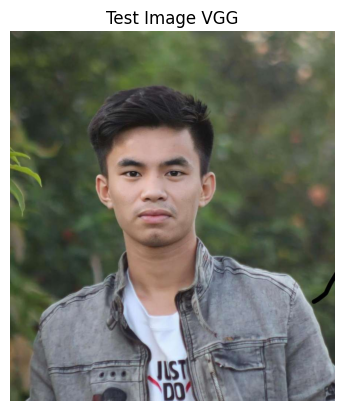

In [144]:
# Load the saved model
saved_model2 = load_model("/content/vgg16.h5")

# Load an image from the test set
img_path = "/content/Testdata/Chakma/C5.jpg"
img2 = image.load_img(img_path, target_size=(img_size[0], img_size[1]))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img, axis=0)
img2 = img/255.  # Normalize the pixel values

# Make predictions
output2 = saved_model.predict(img)

# Printing the class name based on the prediction
if output2[0][0] > 0.5:
    print("Marma")
else:
    print("Chakma")

plt.imshow(mpimg.imread(img_path))
plt.axis('off')
plt.title('Test Image VGG')
plt.show()

In [145]:
# Evaluate the VGG16 model on the testing set
eval_result2 = model.evaluate(test_set, verbose=1)
print(f"Test loss: {eval_result2[0]}, Test accuracy: {eval_result2[1]}")

3/3 [==============================] - 1s 170ms/step - loss: 0.6502 - accuracy: 0.8333
Test loss: 0.650224506855011, Test accuracy: 0.8333333134651184


3/3 [==============================] - 1s 189ms/step


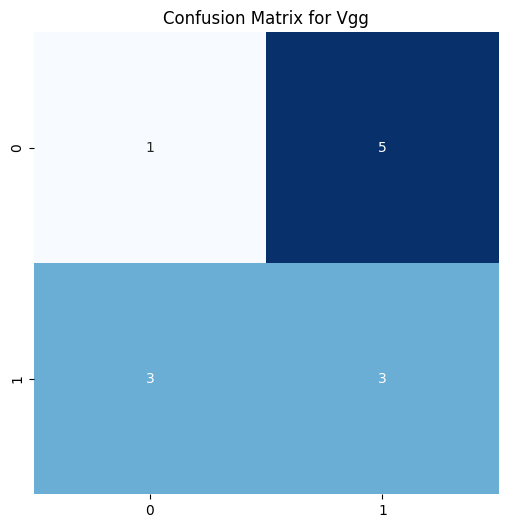

In [180]:
# Make predictions on the testing set
y_pred2 = model.predict(test_set)
y_pred2 = (y_pred2 > 0.5)  # Convert probabilities to binary predictions

# Confusion matrix
cm2 = confusion_matrix(test_set.classes, y_pred2)
plt.figure(figsize=(6, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Vgg")
plt.show()

In [148]:
print(classification_report(test_set.classes, y_pred2))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.50      0.67      0.57         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.49        12
weighted avg       0.50      0.50      0.49        12



# **Comparison Between**

# **Basic CNN and VGG16**

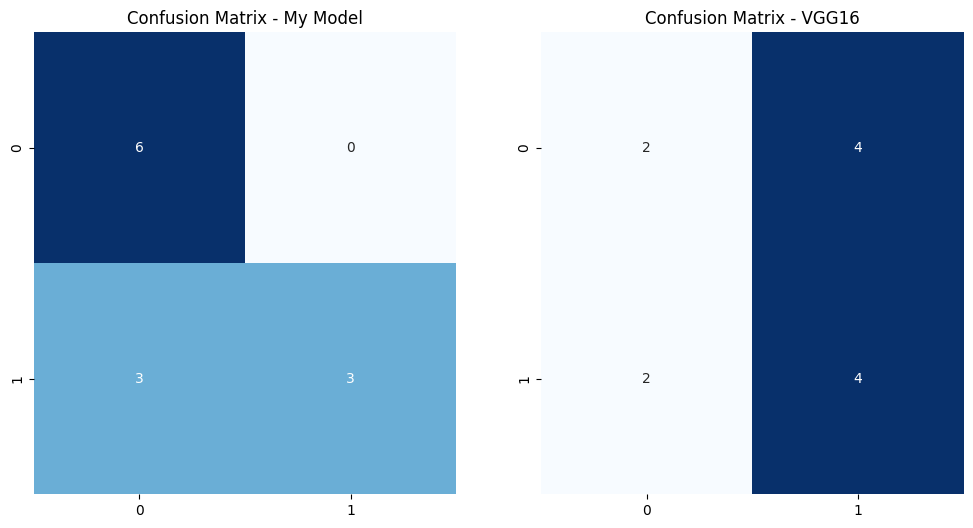

In [151]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - My Model')

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - VGG16')

plt.show()

# **Accuracy Comparison**

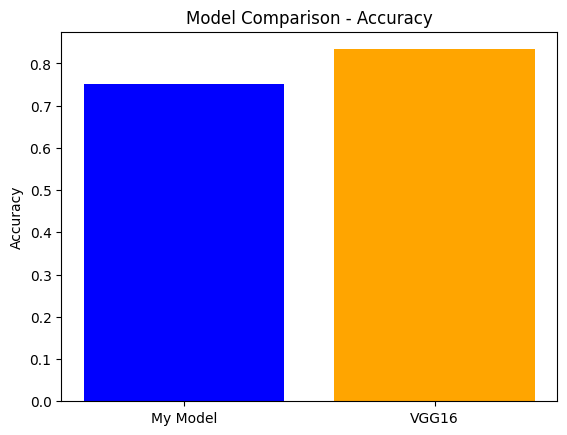

In [165]:
model_names = ['My Model', 'VGG16']
accuracies = [eval_result[1], eval_result2[1]]

plt.bar(model_names, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.show()


# **Training and Validation Accuracy Curves**

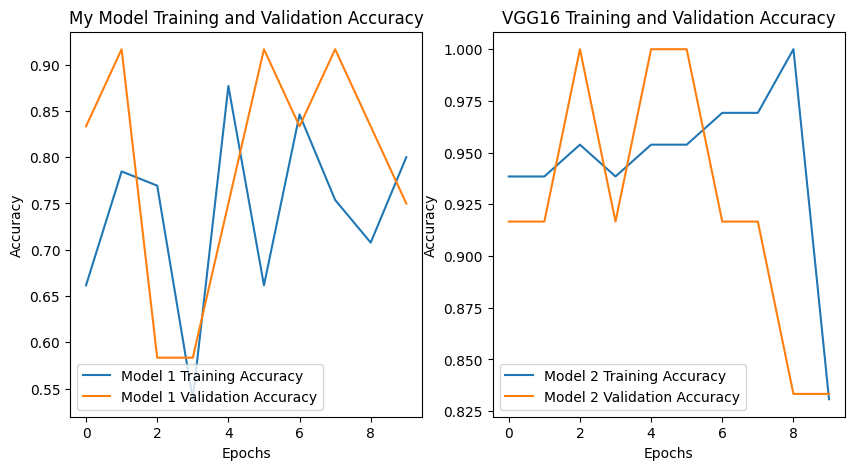

In [173]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Model 1 Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('My Model Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Model 2 Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('VGG16 Training and Validation Accuracy')
plt.legend()

plt.show()

# **Thank You**